Summary statistics of the dataset
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
       Target Yield     Field Size    pH (water)  Organic Carbon  \
count  1.380200e+04   13802.000000  13776.000000    13768.000000   
mean   2.388100e+04     123.463307      6.361474       25.417940   
std    3.808466e+05    7185.915011      0.737447       22.254906   
min    1.000000e+00       0.001000      4.490000        0.900000   
25%    1.200000e+03       0.500000      5.800000       11.900000   
50%    4.500000e+03       1.000000      6.380000       19.900000   
75%    2.000000e+04       2.000000      6.890000       31.400000   
max    4.111111e+07  589674.000000      8.460000      327.200000   

       Total Nitrogen  Phosphorus (M3)

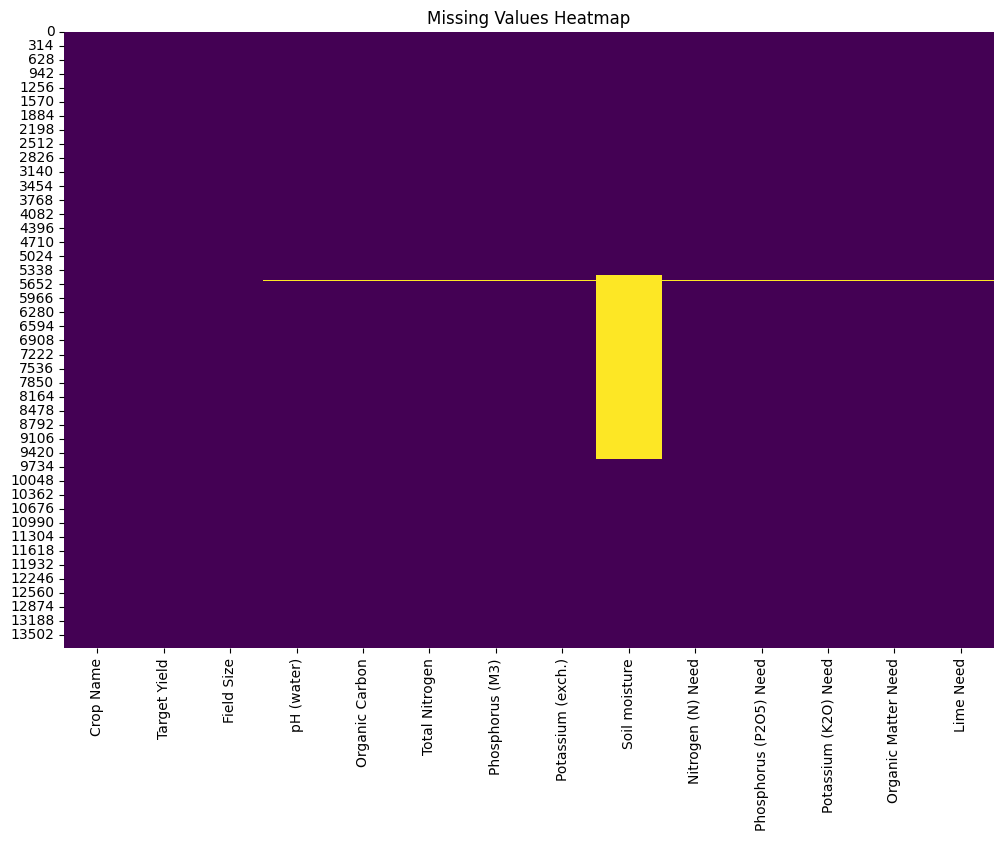

Non-zero values in each column:
Crop Name                 13802
Target Yield              13802
Field Size                13802
pH (water)                13802
Organic Carbon            13802
Total Nitrogen            13802
Phosphorus (M3)           13802
Potassium (exch.)         13802
Soil moisture             13802
Nitrogen (N) Need         13799
Phosphorus (P2O5) Need    13008
Potassium (K2O) Need       3516
Organic Matter Need       12503
Lime Need                 11990
dtype: int64
Zero values in each column:
Crop Name                     0
Target Yield                  0
Field Size                    0
pH (water)                    0
Organic Carbon                0
Total Nitrogen                0
Phosphorus (M3)               0
Potassium (exch.)             0
Soil moisture                 0
Nitrogen (N) Need             3
Phosphorus (P2O5) Need      794
Potassium (K2O) Need      10286
Organic Matter Need        1299
Lime Need                  1812
dtype: int64


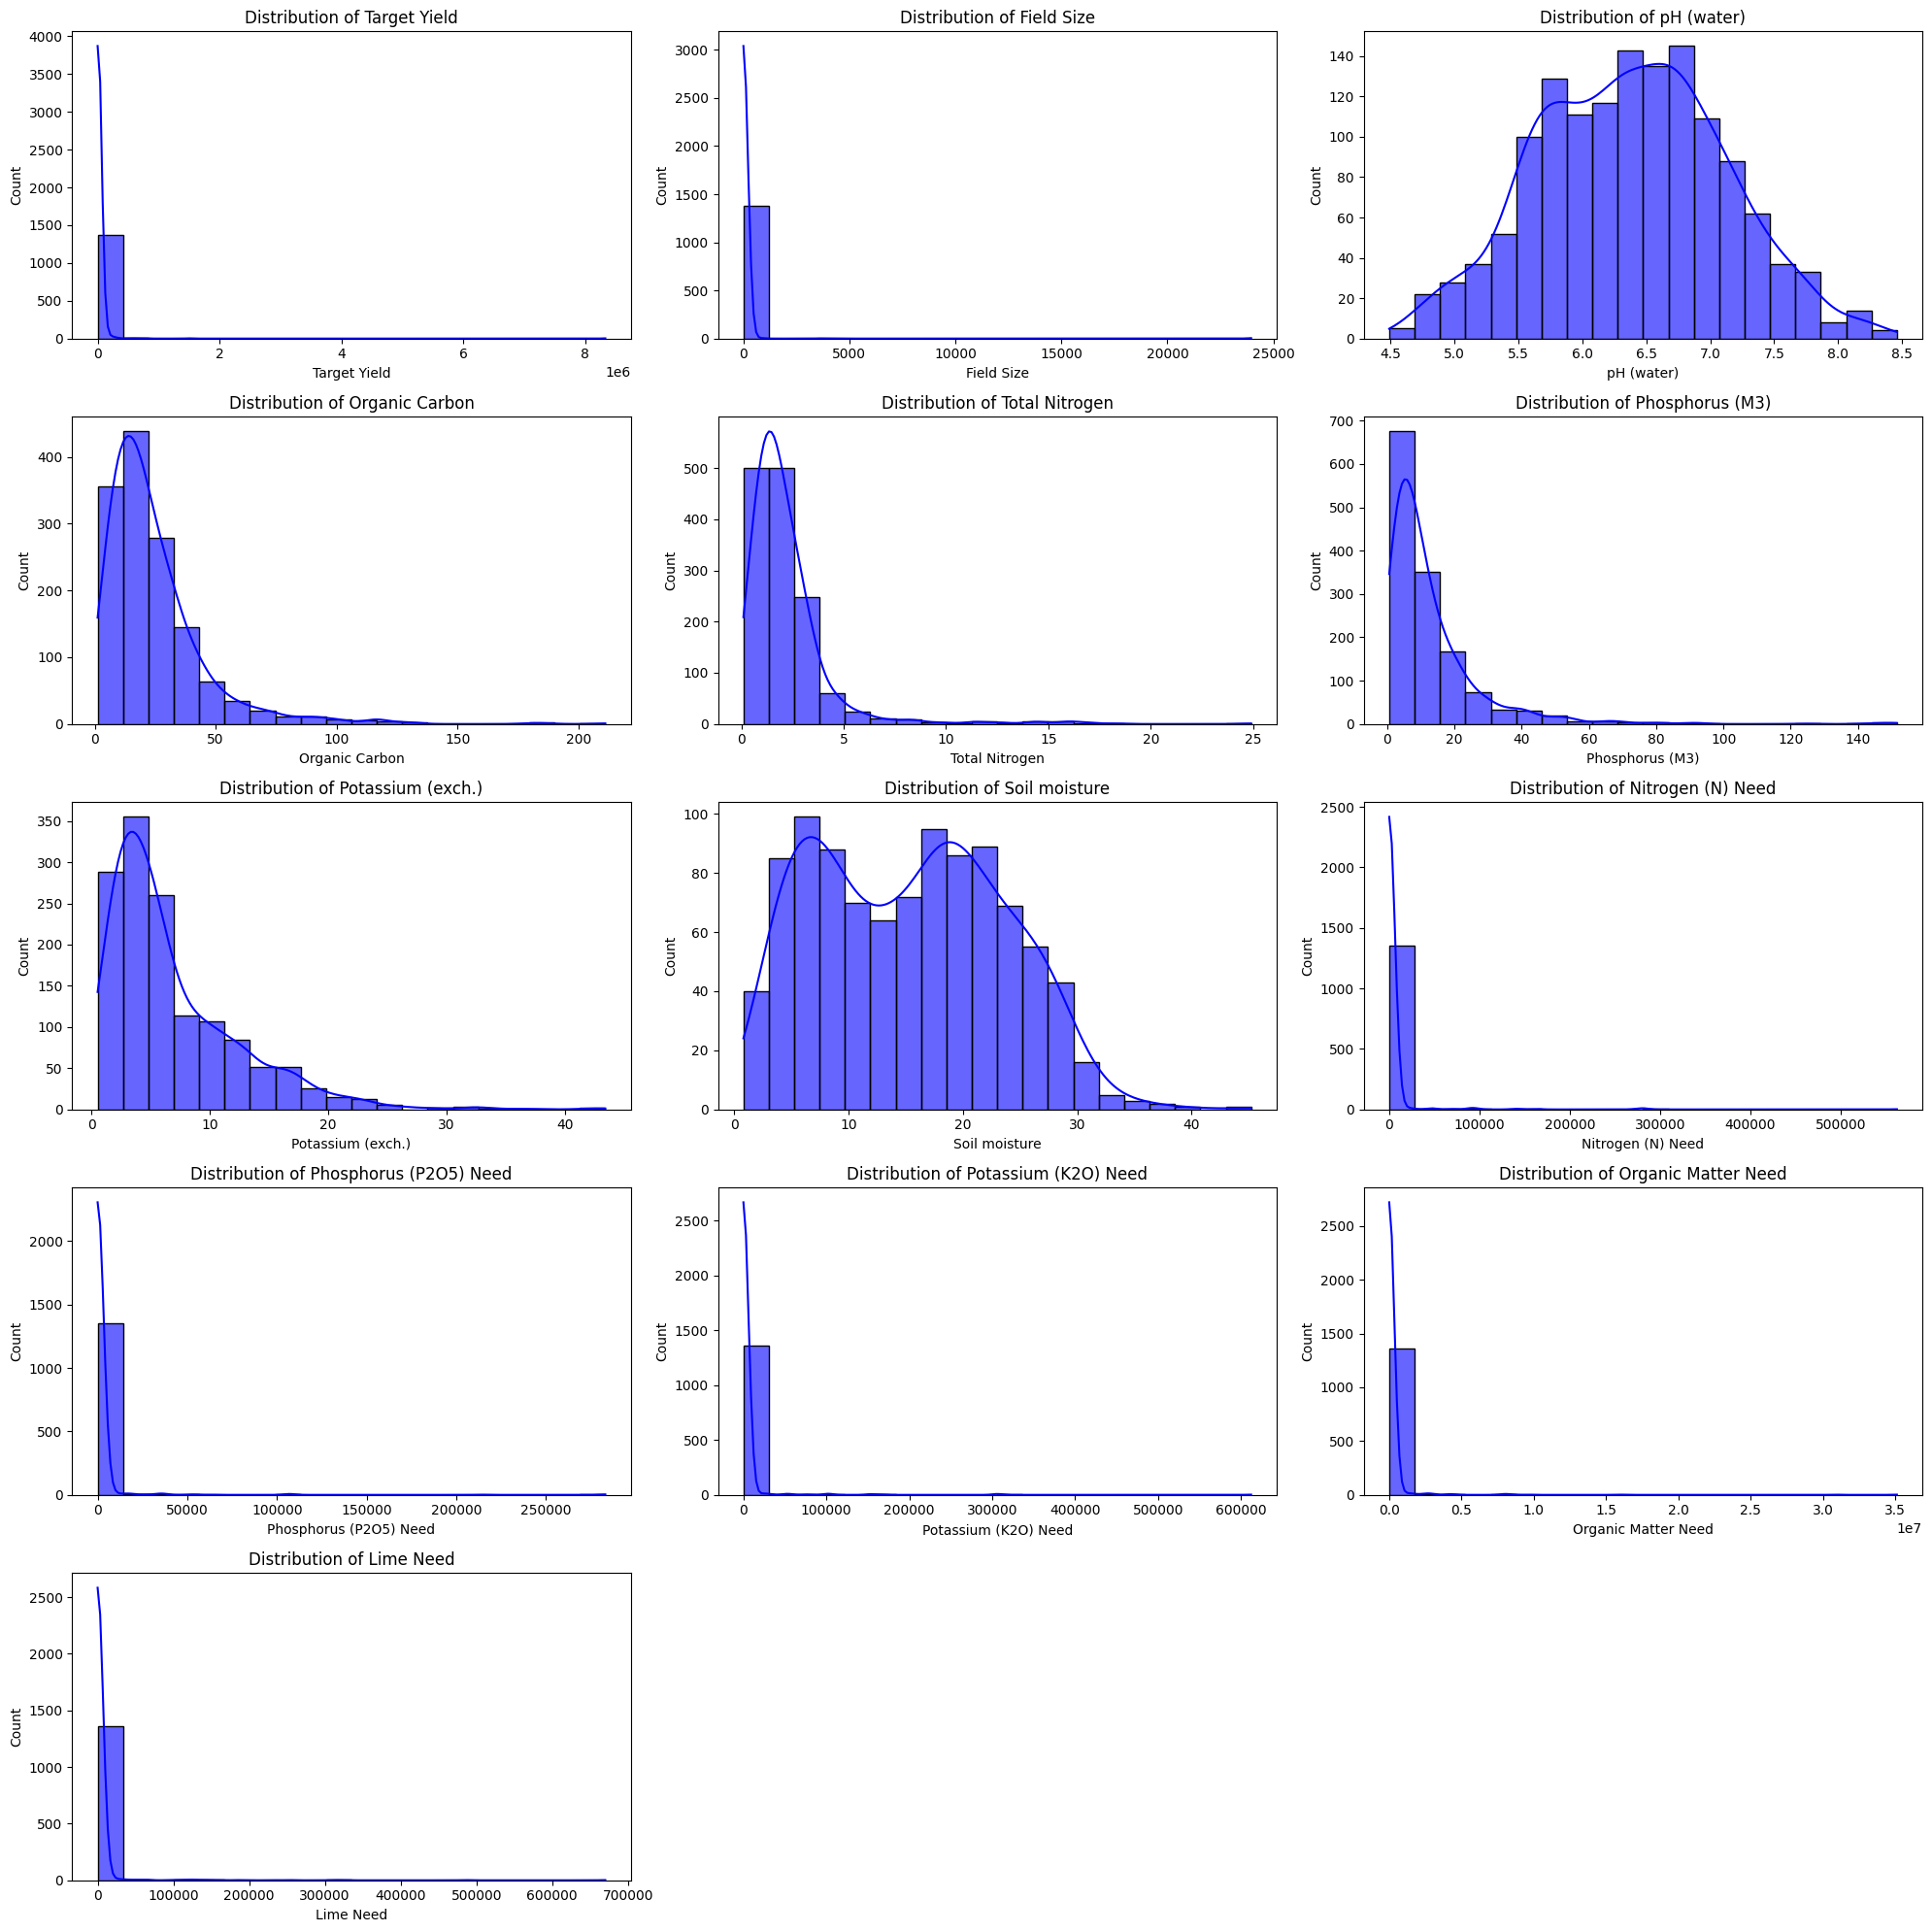

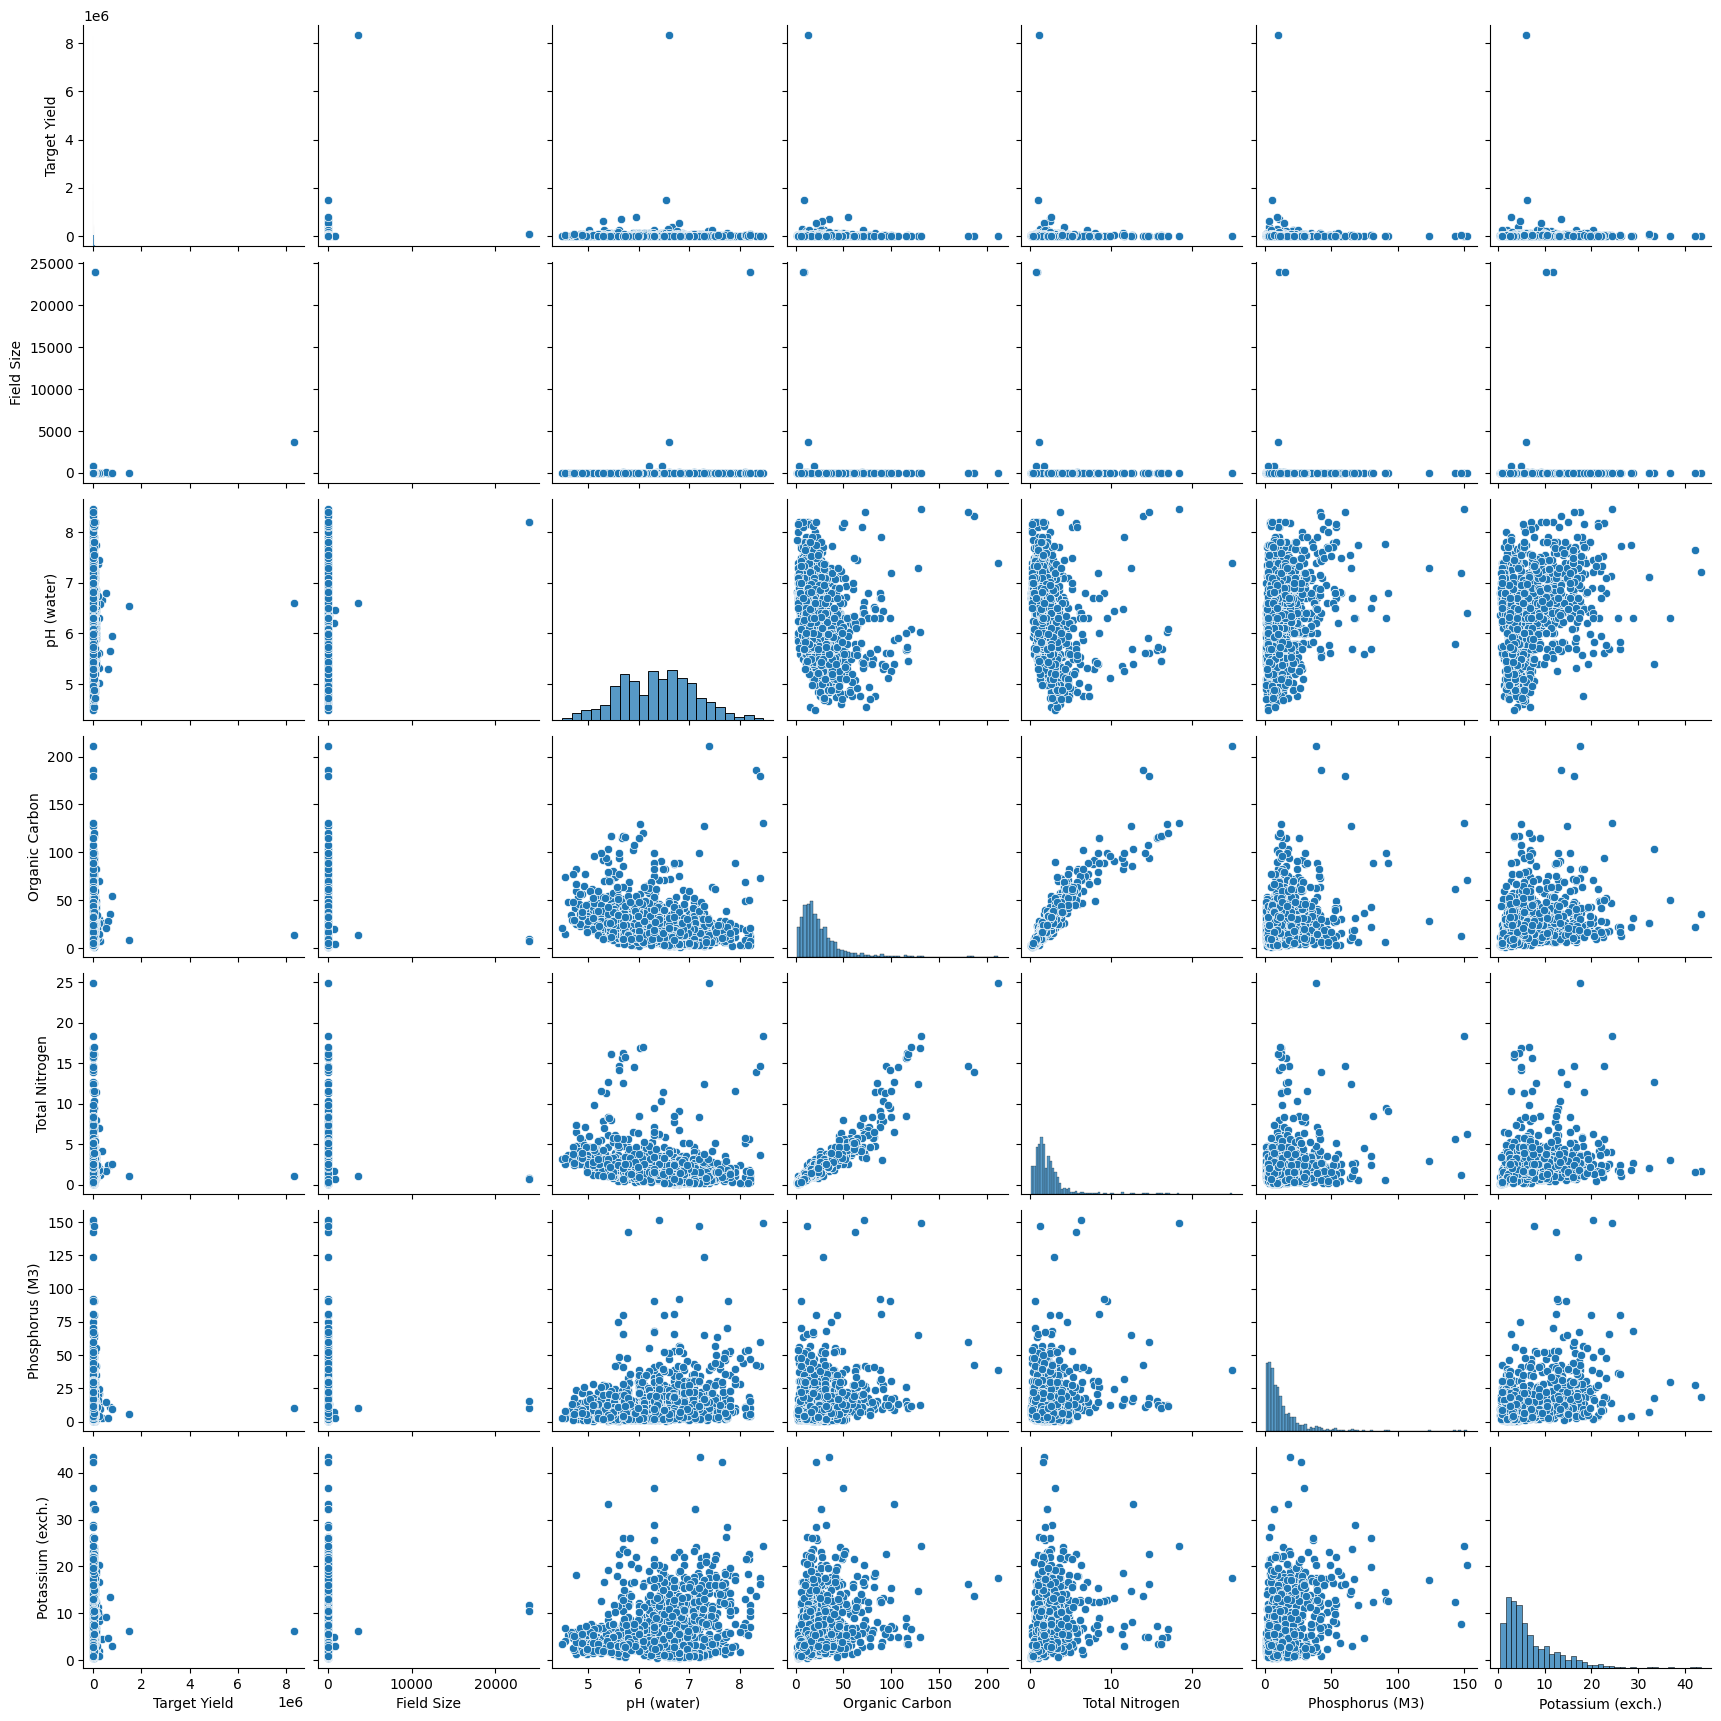

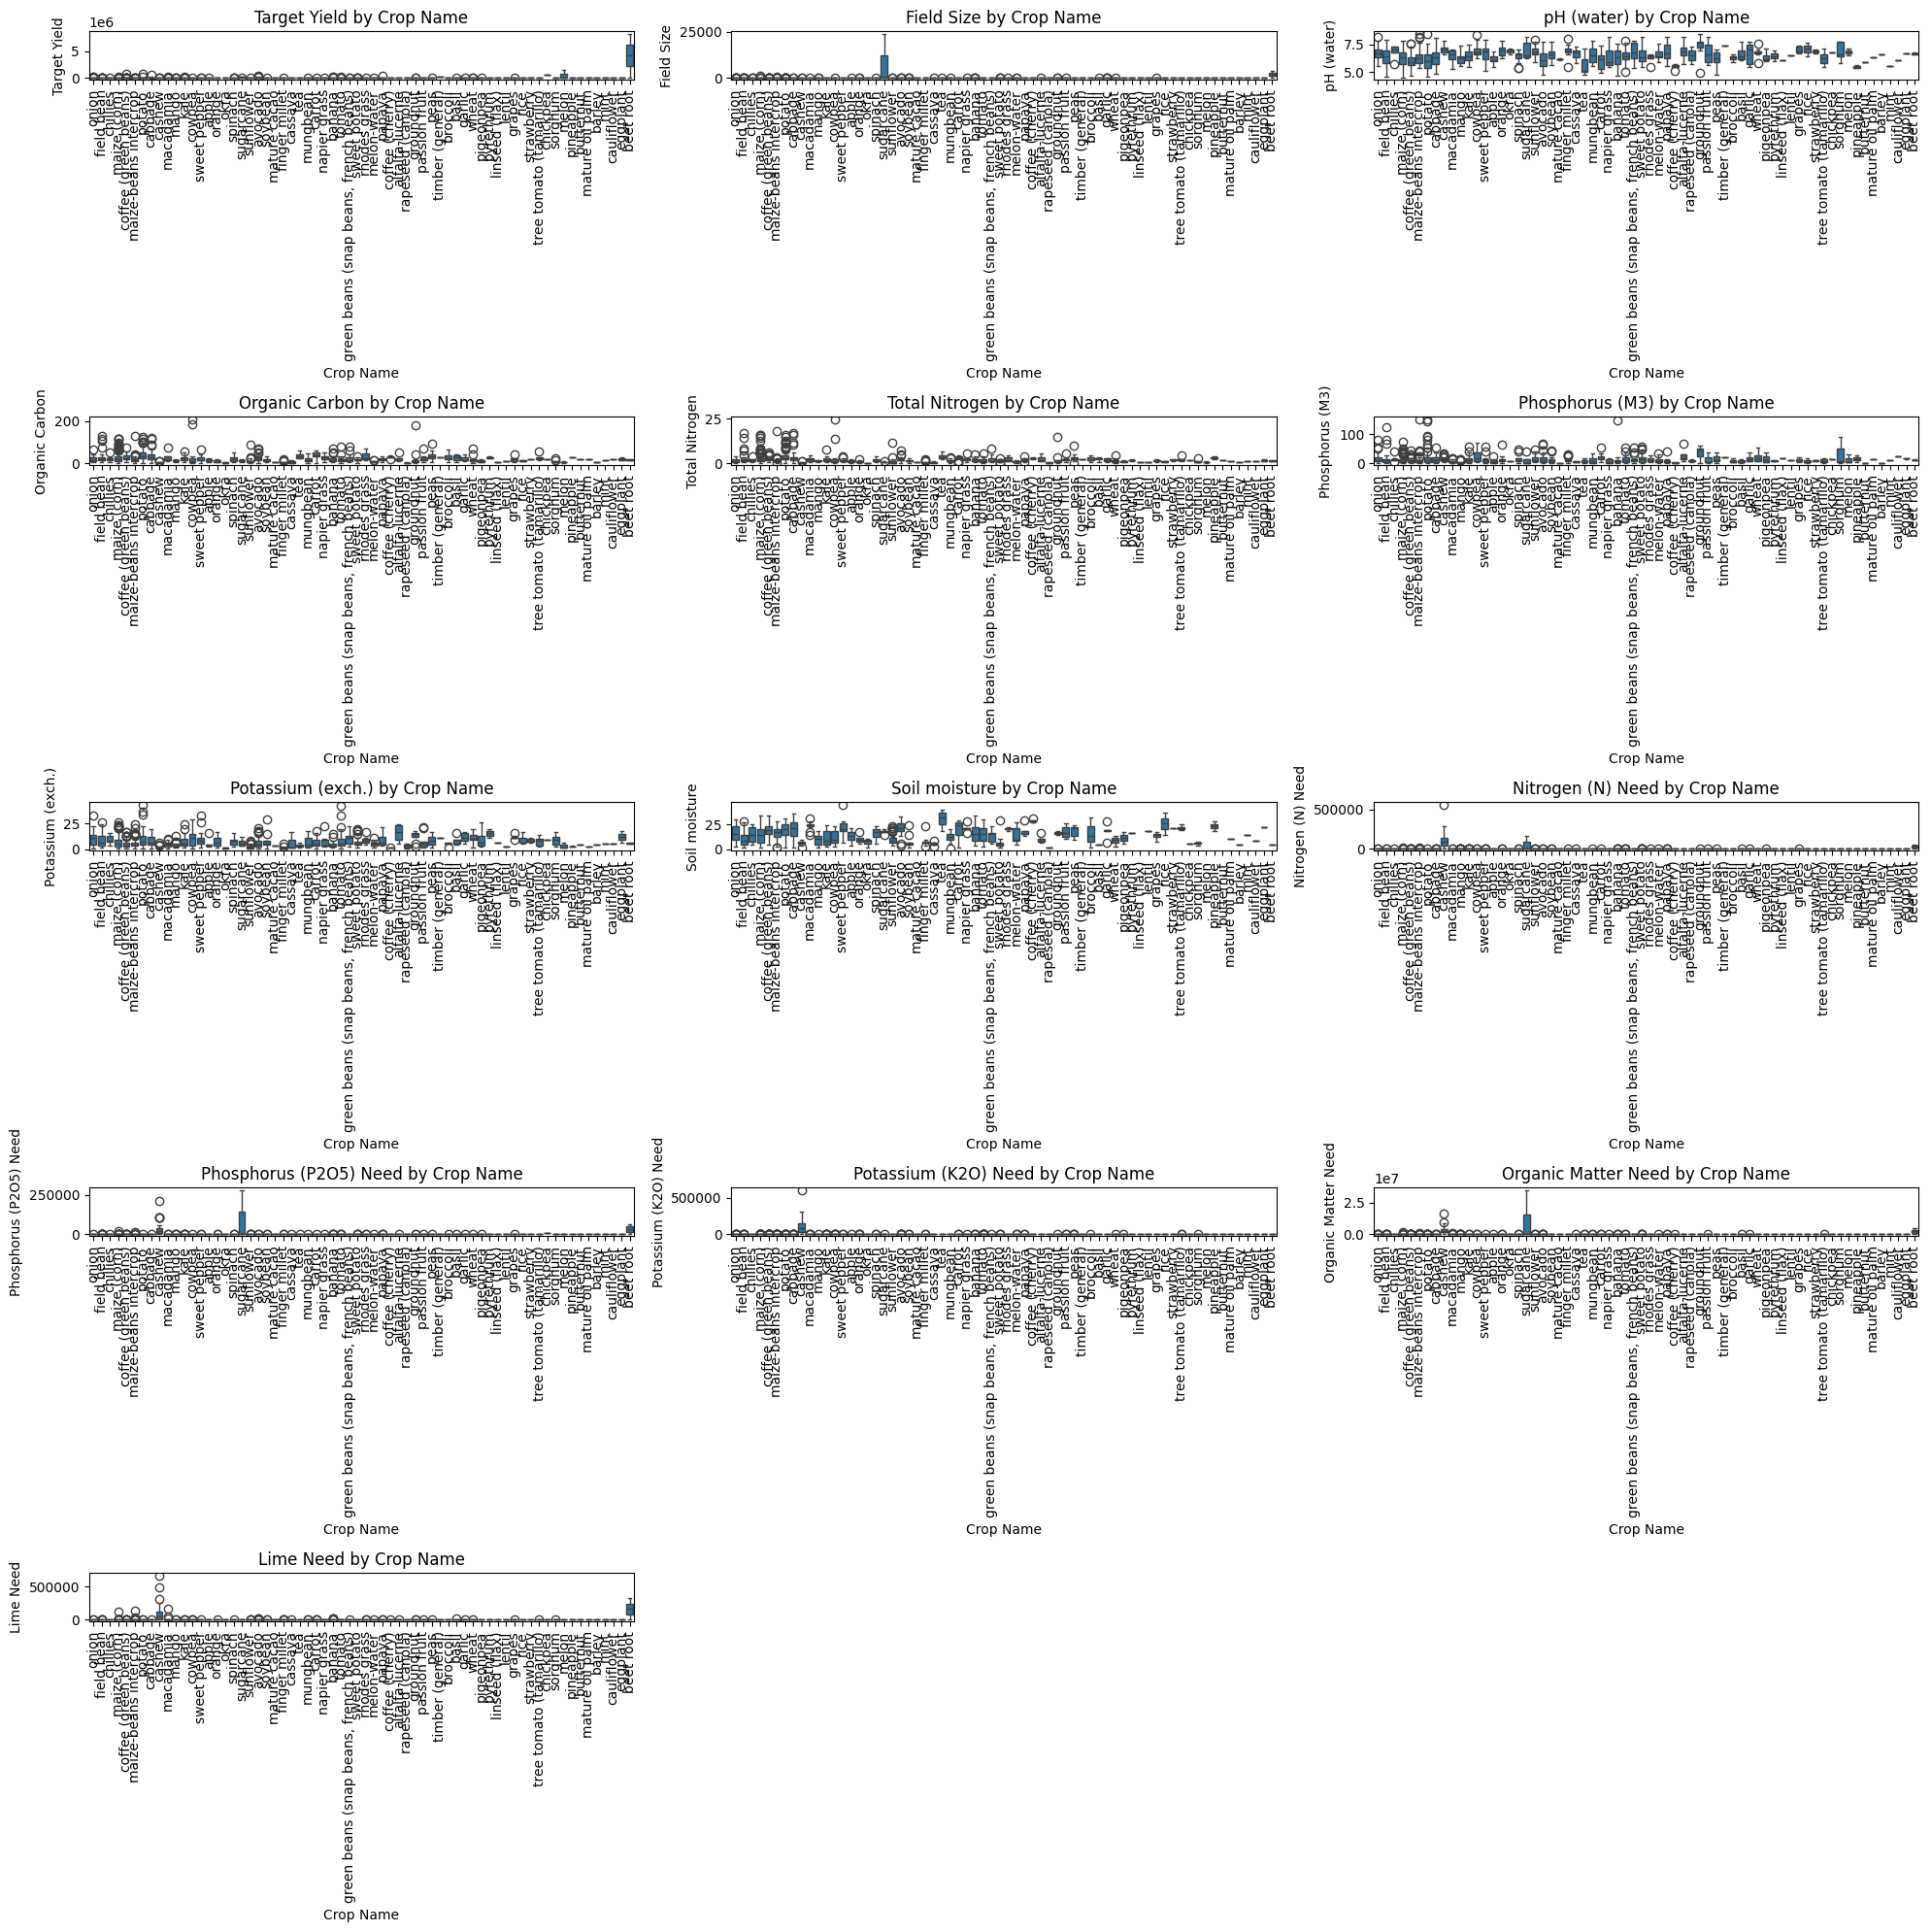

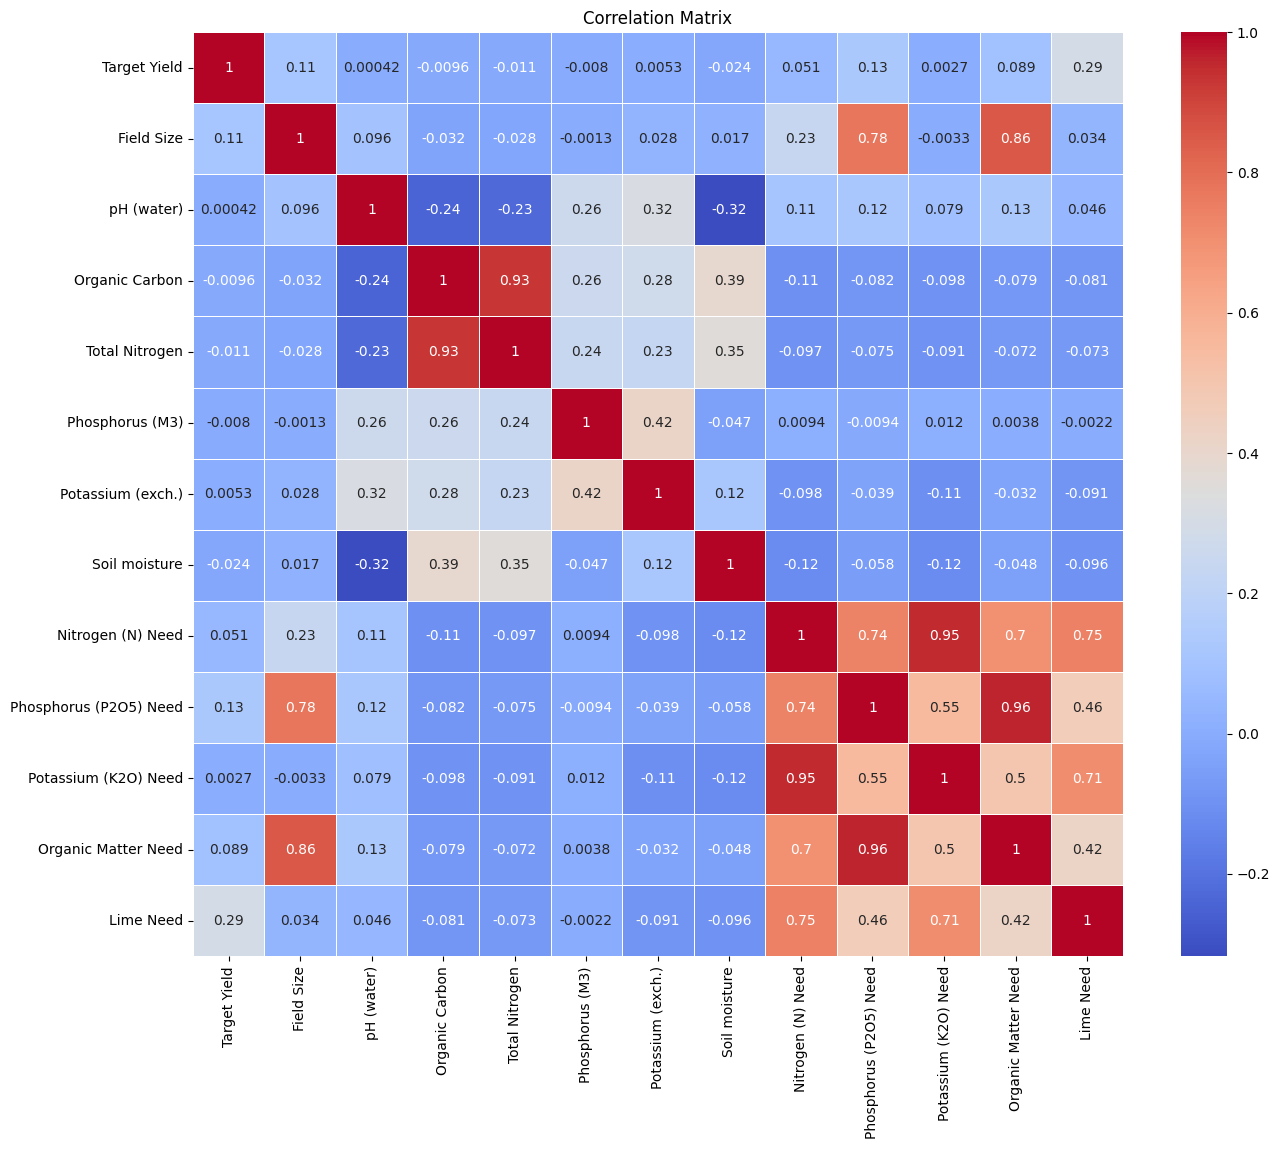

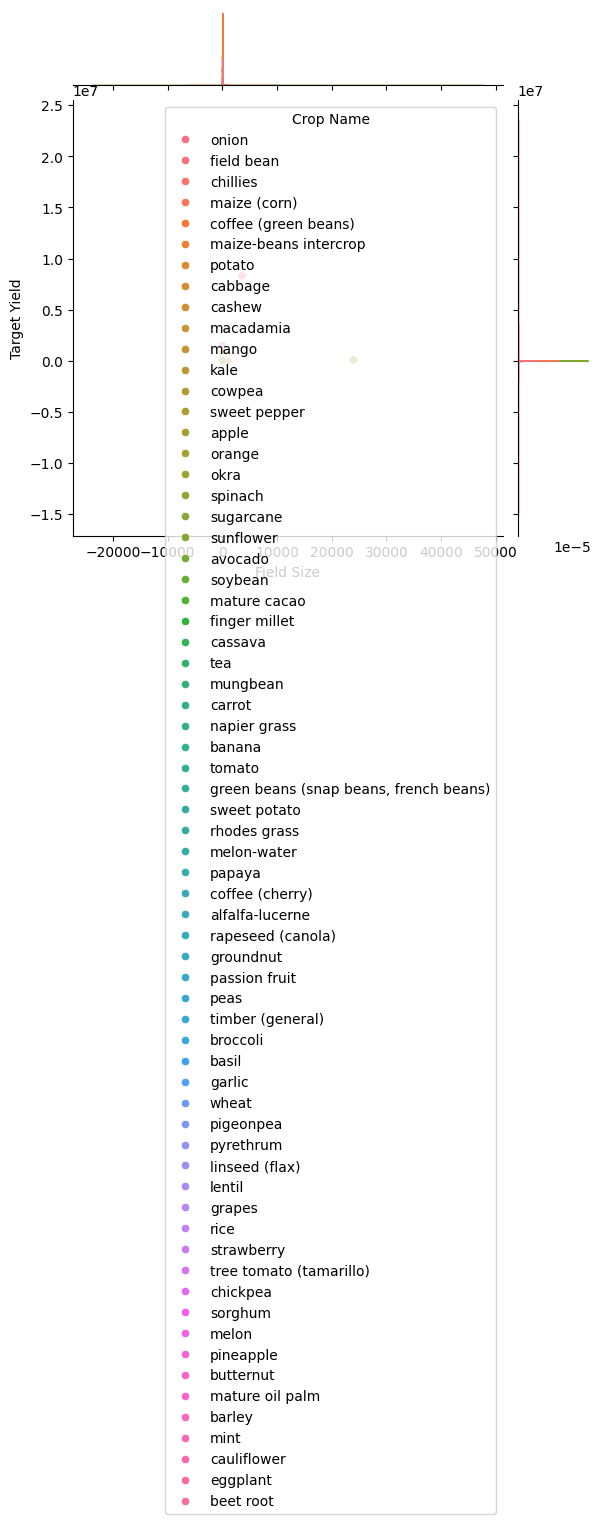

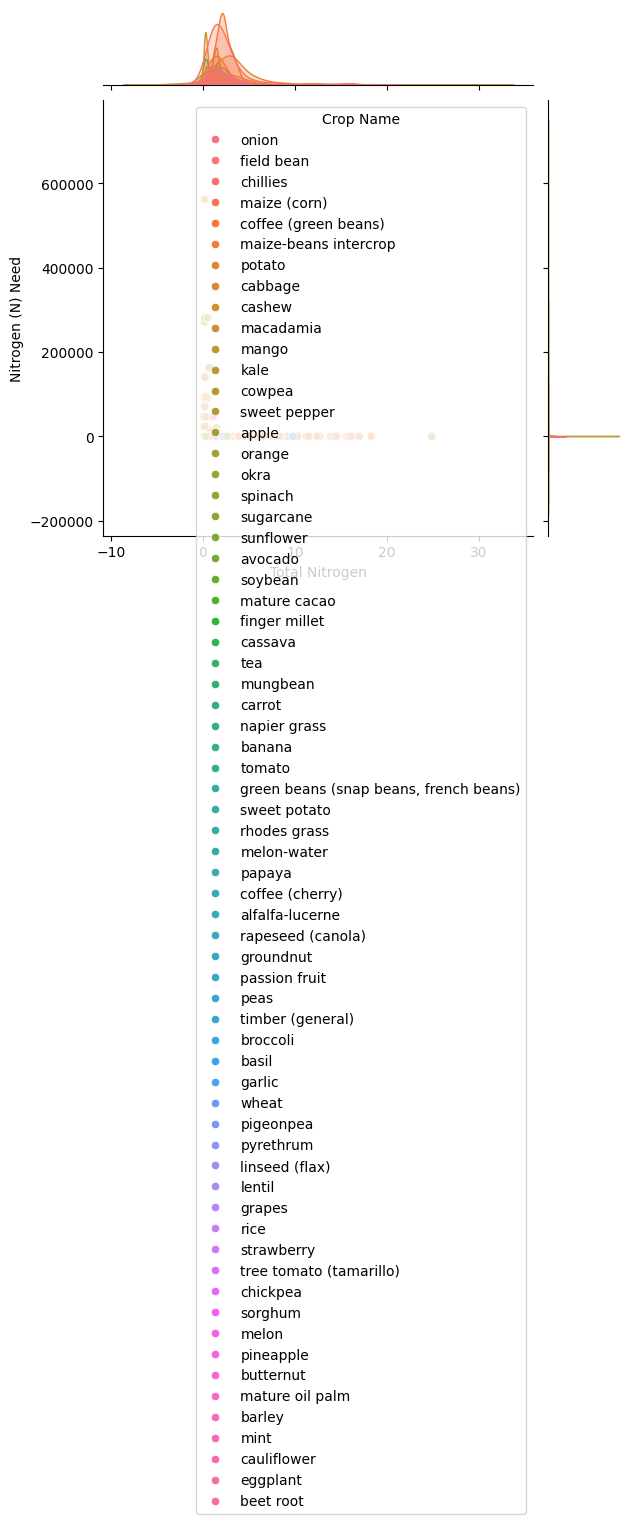

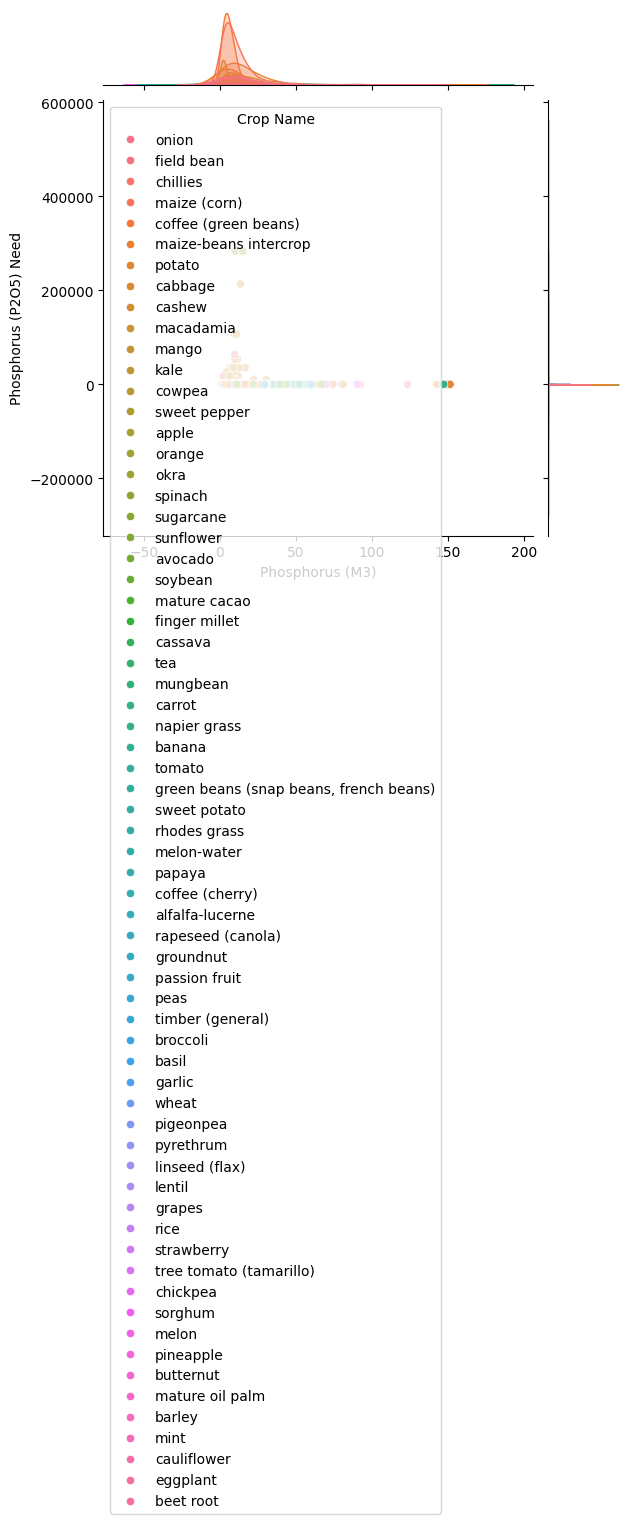

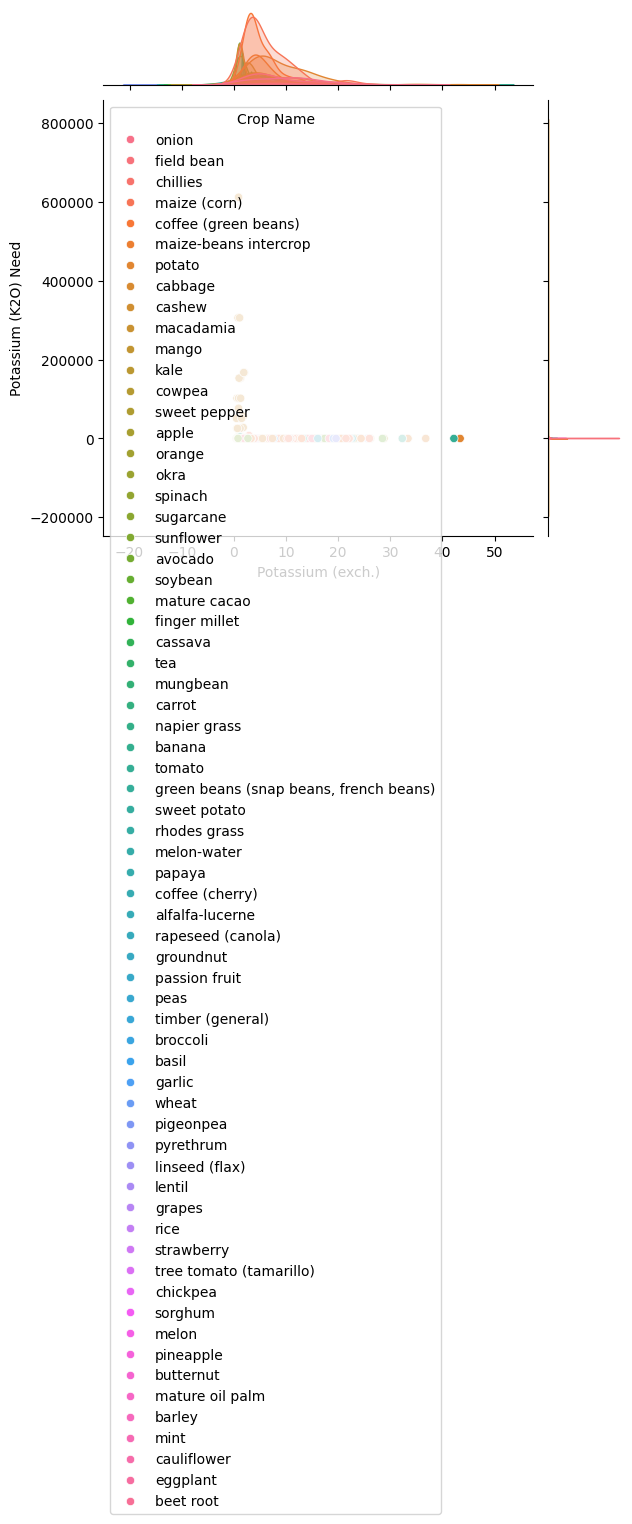

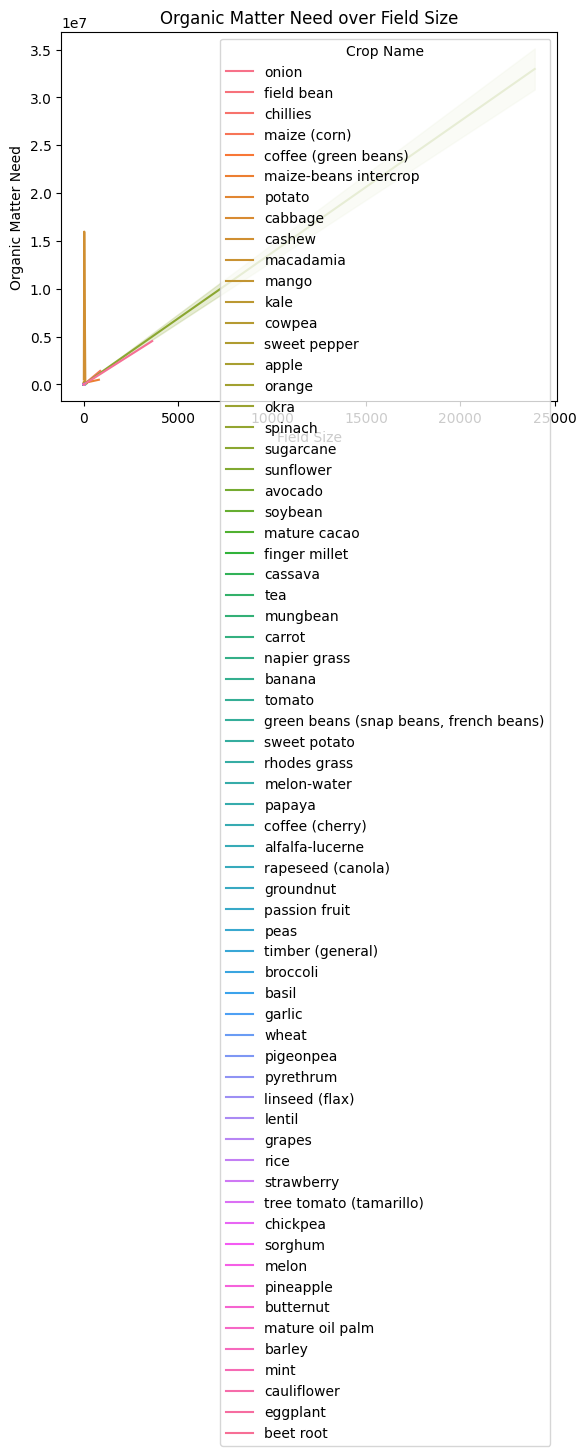

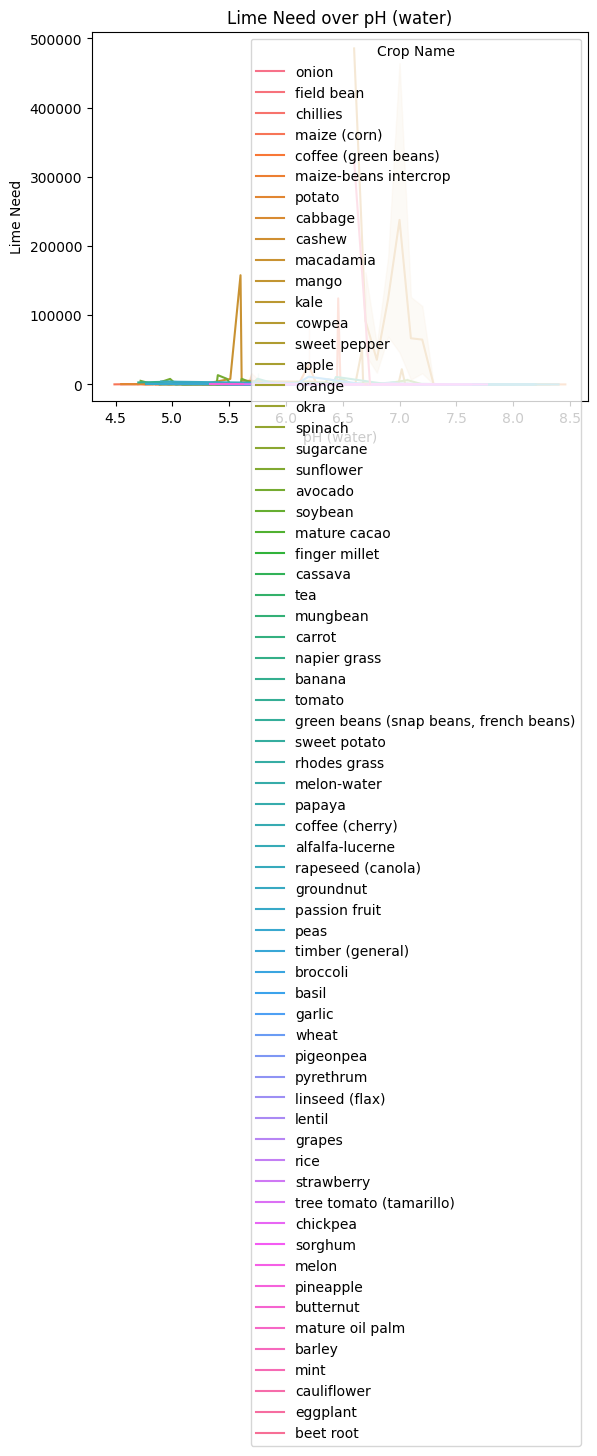

Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Mean Squared Error: 3214355403.4126143
Mean Absolute Error: 2225.9496841014975
R^2 Score: 0.9019878356974051


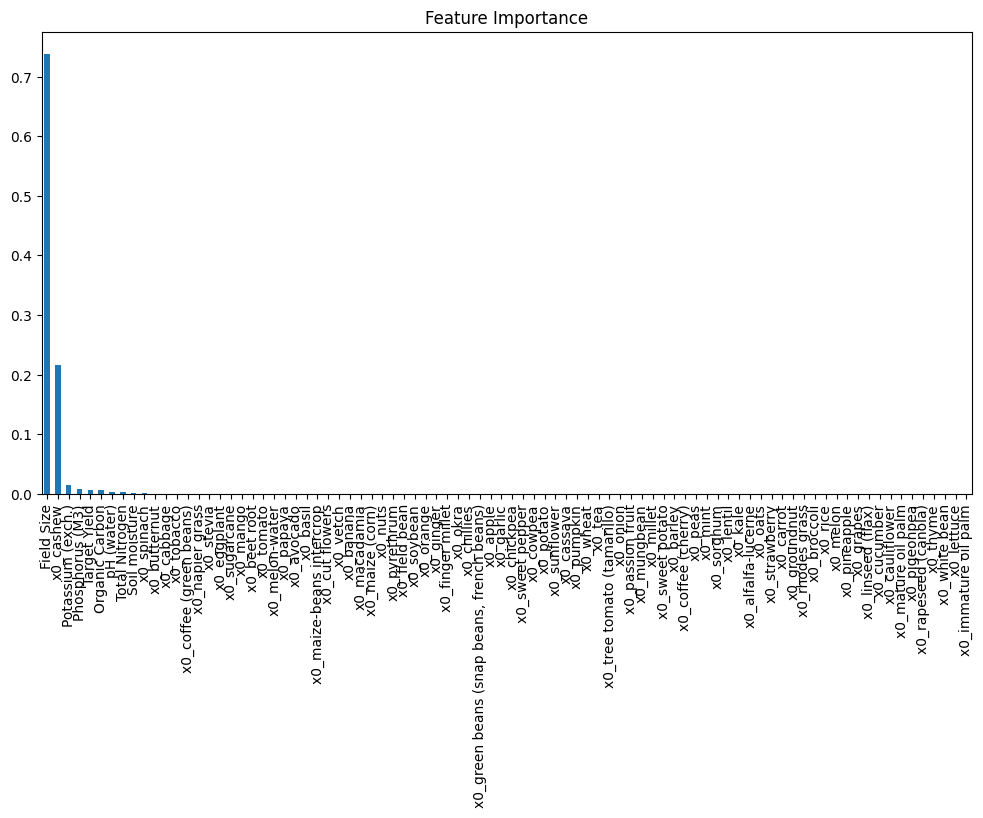

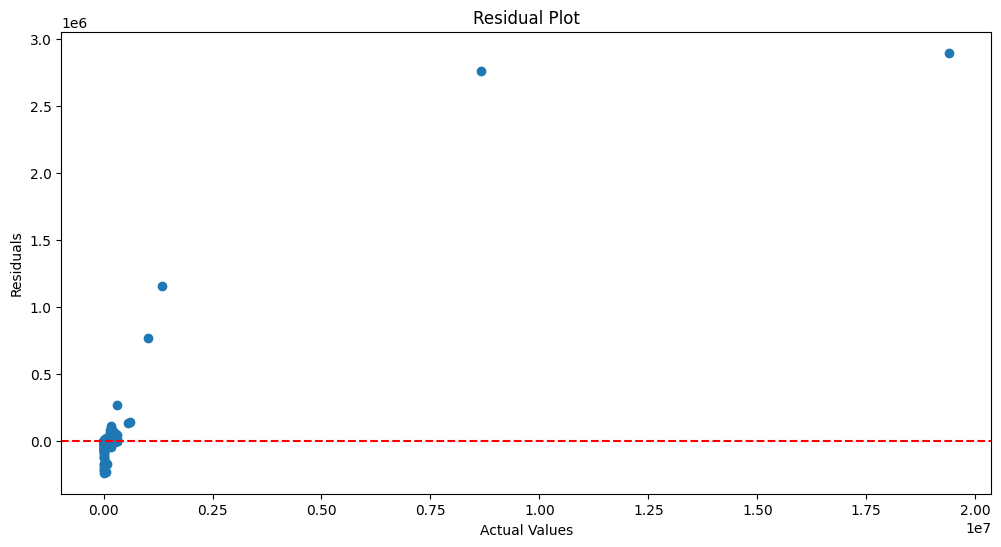

Model saved to random_forest_model.joblib
Predicted nutrient needs:
[[44.42 50.96  0.  ]]


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib

# Load the dataset
file_path = '../docs/Editted2.xlsx'
df = pd.read_excel(file_path)
#Summary stats of the dataset
print("Summary statistics of the dataset")
print(df.columns)
print(df.describe())
print(df.shape)
print(df.head())
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
# Non-zero & zero values count
non_zero_values = (df != 0).sum(axis=0)
print("Non-zero values in each column:")
print(non_zero_values)

zero_values = (df == 0).sum(axis=0)
print("Zero values in each column:")
print(zero_values)
sample_fraction = 0.1
df_sample = df.sample(frac=sample_fraction, random_state=42)

continuous_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                      'Phosphorus (M3)', 'Potassium (exch.)', 'Soil moisture', 
                      'Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 
                      'Organic Matter Need', 'Lime Need']

#perform EDA
plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df_sample[col], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

pairplot_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                    'Phosphorus (M3)', 'Potassium (exch.)']
sns.pairplot(df_sample[pairplot_columns])
plt.show()

plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='Crop Name', y=col, data=df_sample)
    plt.xticks(rotation=90)
    plt.title(f'{col} by Crop Name')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))
corr_matrix = df_sample[continuous_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

sns.jointplot(x="Field Size", y="Target Yield", data=df_sample, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Total Nitrogen", y="Nitrogen (N) Need", data=df_sample, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Phosphorus (M3)", y="Phosphorus (P2O5) Need", data=df_sample, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Potassium (exch.)", y="Potassium (K2O) Need", data=df_sample, kind='scatter', hue='Crop Name')
plt.show()

sns.lineplot(data=df_sample, x='Field Size', y='Organic Matter Need', hue='Crop Name')
plt.title('Organic Matter Need over Field Size')
plt.show()

sns.lineplot(data=df_sample, x='pH (water)', y='Lime Need', hue='Crop Name')
plt.title('Lime Need over pH (water)')
plt.show()

print("Columns in the dataset:")
print(df.columns)

# Define input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features or missing_outputs:
    print("Missing features:", missing_features)
    print("Missing output columns:", missing_outputs)
else:
    X = df[features].copy()
    y = df[output_columns].copy()

    combined = pd.concat([X, y], axis=1)
    combined.dropna(inplace=True)

    X = combined[features]
    y = combined[output_columns]

    numeric_features = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)', 'Potassium (exch.)', 'Soil moisture']
    categorical_features = ['Crop Name']

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Create a pipeline 
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(random_state=42))])

    #split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = pipeline.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")

    # Feature importance analysis
    regressor = model.named_steps['regressor']
    feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out())
    importances = regressor.feature_importances_
    feature_importance = pd.Series(importances, index=feature_names)
    feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
    plt.title("Feature Importance")
    plt.show()

    # Residual analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test.values.flatten(), residuals.values.flatten())
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

    # Save the model to a file
    model_filename = '/home/space/Project01/docs/ModelV2.joblib'
    joblib.dump(model, model_filename)
    print(f"Model saved to {model_filename}")

    def predict_nutrient_needs(model, input_data):
        input_df = pd.DataFrame(input_data)
        input_df = pd.get_dummies(input_df, columns=['Crop Name'])
        for col in X.columns:
            if col not in input_df.columns:
                input_df[col] = 0
        input_df = input_df[X.columns]
        predictions = model.predict(input_df)
        return predictions

    # Example input data for prediction
    new_data = {
        'Crop Name': ['onion'],
        'Target Yield': [15000.0],
        'Field Size': [1.0],
        'pH (water)': [7.4],
        'Organic Carbon': [16.8],
        'Total Nitrogen': [1.5],
        'Phosphorus (M3)': [19.8],
        'Potassium (exch.)': [17.3],
        'Soil moisture': [16.1]
    }

    predictions = predict_nutrient_needs(model, new_data)

    print("Predicted nutrient needs:")
    print(predictions)
